In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 100)
%matplotlib inline

In [2]:
transactions = pd.read_csv('./user_transactions.csv')
user_base = pd.read_csv('./user_base_part1_edit.csv')
user_label = pd.read_csv('./user_label_branch_edit.csv')

# Data Cleaning

In [3]:
# divide monetary value by 10000 so that it is easier to read
combine = (
    transactions
    .merge(user_base, on='user_id', how='left')
    .merge(user_label, on='user_id', how='left')
    [['user_id', 'branch_code', 'default_flag', 'number_of_cards', 'outstanding', 'credit_limit', 'bill', 'total_cash_usage',
       'total_retail_usage', 'total_usage', 'total_usage_per_limit', 'total_3mo_usage_per_limit',
       'total_6mo_usage_per_limit', 'remaining_bill', 'payment_ratio', 'payment_ratio_3month', 'payment_ratio_6month','overlimit_percentage',
       'delinquency_score', 'years_since_card_issuing',
       'remaining_bill_per_number_of_cards', 'remaining_bill_per_limit', 'utilization_3month', 'utilization_6month']]
    .pipe(lambda x: x.assign(outstanding=x.outstanding/10000))
    .pipe(lambda x: x.assign(credit_limit=x.credit_limit/10000))
    .pipe(lambda x: x.assign(bill=x.bill/10000))
    .pipe(lambda x: x.assign(total_cash_usage=x.total_cash_usage/10000))
    .pipe(lambda x: x.assign(total_retail_usage=x.total_retail_usage/10000))
    .pipe(lambda x: x.assign(total_usage=x.total_usage/10000))
    .pipe(lambda x: x.assign(remaining_bill=x.remaining_bill/10000))
    .pipe(lambda x: x.assign(remaining_bill_per_number_of_cards=x.remaining_bill_per_number_of_cards/10000))
)

In [4]:
combine[['total_cash_usage', 'total_retail_usage', 'total_usage']].describe()

,total_cash_usage,total_retail_usage,total_usage
count,15600.000000,15645.000000,15645.000000
mean,7.457618,202.480595,209.928120
std,61.778729,790.934462,807.325021
min,0.000000,-1566.720000,-1566.720000
25%,0.000000,0.000000,0.000000
50%,0.000000,20.000000,24.380000
75%,0.000000,139.620400,150.747800
max,2884.057200,28500.000000,31400.000000


Since there are 45 null values in the total_cash_usage, I would need to find a way to fill in those missing values. 

Logically, it seems that total_cash_usage + total_retail_usage = total_usage. If this were true, I would be able to use total_retail_usage and total_usage to calculate total_cash_usage.

In [5]:
# assuming total_cash_usage + total_retail_usage = total_usage
# check out assumption
check_assumption1 = (
    combine
    [['total_cash_usage', 'total_retail_usage', 'total_usage']]
    .fillna('x')
    .query("total_cash_usage != 'x'")
    .pipe(lambda x: x.assign(total_usage_check=x.total_cash_usage+x.total_retail_usage-x.total_usage))
)

In [6]:
print("% of rows that does not tally: " + str(round(len(check_assumption1.query("total_usage_check !=0"))/check_assumption1.shape[0] * 100, 1)) + '%')

% of rows that does not tally: 0.3%


In [7]:
check_assumption1.query("total_usage_check !=0")

,total_cash_usage,total_retail_usage,total_usage,total_usage_check
75,70,110.6768,180.6768,2.84217e-14
173,80,25.2665,105.2665,1.42109e-14
594,300,426.9589,726.9589,1.13687e-13
1325,200,109.3785,309.3785,5.68434e-14
1464,20,44.5006,64.5006,-1.42109e-14
2555,88,66.3470,154.3470,-2.84217e-14
2749,50,127.4036,177.4036,-2.84217e-14
2795,30,36.1350,66.1350,-1.42109e-14
2828,350,88.5350,438.5350,-5.68434e-14
3085,150,461.3427,611.3427,-1.13687e-13


After doing a check, it seems that my assumption is correct. For most of the rows that do not fit the assumption, it just seems to be a rounding issue. I will proceed to fill in the null values of total_cash_usage with total_usage - total_retail_usage. Furthermore, I would think that it is impossible to have negative values for total_usage and total_retail_usage. In order to resolve the negative values, I will mulitply those values with -1.

In [8]:
print("% of data points where total_retail_usage or total_usage is negative: " + str(round(len(combine.query("total_retail_usage < 0 or total_usage < 0"))/combine.shape[0] * 100, 1)) + '%')

% of data points where total_retail_usage or total_usage is negative: 0.3%


In [9]:
# assumption is correct
# fill missing null values of total_cash_usage with total_usage - total_retail_usage 
# correct rows where total_usage != total_cash_usage + total_retail_usage
# mulitply -1 with values where total_usage or total_retail_usage is negaive
combine = (
    combine
    .fillna({"total_cash_usage": -999})
    .pipe(lambda x: x.assign(total_retail_usage=np.where(x.total_retail_usage<0, -1*x.total_retail_usage, x.total_retail_usage)))
    .pipe(lambda x: x.assign(total_usage=np.where(x.total_usage<0, -1*x.total_usage, x.total_usage)))
    .pipe(lambda x: x.assign(total_cash_usage=np.where(x.total_cash_usage==-999, x.total_usage-x.total_retail_usage, x.total_cash_usage)))
    .pipe(lambda x: x.assign(total_usage_check=x.total_usage-x.total_cash_usage-x.total_retail_usage))
    .pipe(lambda x: x.assign(total_usage=np.where(x.total_usage_check!=0, x.total_cash_usage+x.total_retail_usage, x.total_usage)))
    .drop('total_usage_check', axis=1)
)

In [10]:
combine[['total_usage_per_limit', 'total_3mo_usage_per_limit', 'total_6mo_usage_per_limit']].describe()

,total_usage_per_limit,total_3mo_usage_per_limit,total_6mo_usage_per_limit
count,15645.000000,15645.000000,15645.000000
mean,0.108977,0.167157,0.202598
std,0.199740,0.192212,0.274314
min,-0.632000,-0.126000,0.000000
25%,0.000000,0.034767,0.032600
50%,0.021700,0.108000,0.117000
75%,0.127143,0.239000,0.285000
max,4.600000,3.490000,8.110000


Similarly, I would think that it is improbable for the columns total_usage_per_limit and total_3mo_usage_per_limit to have negative values. To correct these values, I would make the assumption that total_usage_per_limit = total_usage/credit_limit. 

In [11]:
# assume total_usage_per_limit is calculated as total_usage/credit_limit
check_assumption2 = (
    combine
    [['credit_limit', 'total_usage', 'total_usage_per_limit']]
    .pipe(lambda x: x.assign(total_usage_per_limit_recal=x.total_usage/x.credit_limit))
    .pipe(lambda x: x.assign(total_usage_per_limit_check=round(x.total_usage_per_limit_recal-abs(x.total_usage_per_limit), 1)))
)

In [12]:
check_assumption2.query("total_usage_per_limit_check != 0")

,credit_limit,total_usage,total_usage_per_limit,total_usage_per_limit_recal,total_usage_per_limit_check
4819,300.0,259.3022,0.602,0.864341,0.3


All, but one entry agreeds with my assumption in total_usage_per_limit calculation logic. I will proceed to re-calculate the total_usage_per_limit to remove erroneous data like the above entry as well as negative values. As for resolving negative total_3mo_usage_per_limit, I will multiply -1 to the negative values.

In [13]:
# other than index 4819, the assumption on the calculation of total_usage_per_limit seems right
# re-calculate total_usage_per_limit using total_usage/credit_limit to get rid of negative values of total_usage_per_limit
# multiply -1 to negative total_3mo_usage_per_limit
combine = (
    combine
    .pipe(lambda x: x.assign(total_usage_per_limit=x.total_usage/x.credit_limit))
    .pipe(lambda x: x.assign(total_3mo_usage_per_limit=np.where(x.total_3mo_usage_per_limit<0, -1*x.total_3mo_usage_per_limit, x.total_3mo_usage_per_limit)))
)

In [14]:
combine[['payment_ratio', 'payment_ratio_3month', 'payment_ratio_6month']].describe()

,payment_ratio,payment_ratio_3month,payment_ratio_6month
count,15645.000000,15645.000000,15645.000000
mean,64.438215,50.496321,81.544782
std,790.320478,1320.816758,1460.736051
min,-18138.000000,-57792.340000,-77056.000000
25%,0.000000,20.200000,21.500000
50%,26.900000,50.000000,65.500000
75%,100.000000,91.200000,100.000000
max,68983.000000,75575.000000,54899.000000


Assuming that payment is calculated as payment_ratio * bill, the payment for each month is outrageous. The median payment_ratio is approximately 27, meaning to say that 50% of the users are making payment of more than 27 times their last month bill. As such, I would assume that the unit of payment_ratio, payment_ratio_3month and payment_ratio_6month columns are in percentages. I will divide these columns by 100 to obtain the actual ratio. Furthermore, I will multiply -1 to negative payment ratios as it is logically impossible to have negative payment ratios.

In [15]:
# divide payment ratios columns by 100 to get the real payment_ratio
# for payment ratios that are negative, I will mulitply by -1
combine = (
    combine
    .pipe(lambda x: x.assign(payment_ratio=x.payment_ratio/100))
    .pipe(lambda x: x.assign(payment_ratio=np.where(x.payment_ratio<0, -1*x.payment_ratio, x.payment_ratio)))
    .pipe(lambda x: x.assign(payment_ratio_3month=x.payment_ratio_3month/100))
    .pipe(lambda x: x.assign(payment_ratio_3month=np.where(x.payment_ratio_3month<0, -1*x.payment_ratio_3month, x.payment_ratio_3month)))
    .pipe(lambda x: x.assign(payment_ratio_6month=x.payment_ratio_6month/100))
    .pipe(lambda x: x.assign(payment_ratio_6month=np.where(x.payment_ratio_6month<0, -1*x.payment_ratio_6month, x.payment_ratio_6month)))
)

In [16]:
combine[['payment_ratio', 'payment_ratio_3month', 'payment_ratio_6month']].describe()

,payment_ratio,payment_ratio_3month,payment_ratio_6month
count,15645.000000,15645.000000,15645.000000
mean,0.701148,1.092672,1.191463
std,7.898371,13.172573,14.581506
min,0.000000,0.000000,0.000000
25%,0.000000,0.207000,0.222000
50%,0.271000,0.501000,0.660000
75%,1.000000,0.921000,1.000000
max,689.830000,755.750000,770.560000


From the table above, we can see that there are some outliers in payment ratio columns. The maximum payment ratios is approximately 700 times the 75th percentile and it is probably impossible to make a payment 700x the customer's bill. As such, I would think that there are some erroneous data in these columns. In order to pick them out, I will use IQR to decide on my upper limit and I will treat everything above it as outliers.

In [17]:
# using iqr to spot outliers
def upper_limit(df, column):
    iqr = df['{}'.format(column)].quantile(q=0.75) - df['{}'.format(column)].quantile(q=0.25)
    upper_limit = df['{}'.format(column)].quantile(q=0.75) + 1.5*iqr
    print("upper limit of {} based on 1.5*IQR: ".format(column) + str(upper_limit))

In [18]:
upper_limit(combine, 'payment_ratio')
upper_limit(combine, 'payment_ratio_3month')
upper_limit(combine, 'payment_ratio_6month')

upper limit of payment_ratio based on 1.5*IQR: 2.5
upper limit of payment_ratio_3month based on 1.5*IQR: 1.992
upper limit of payment_ratio_6month based on 1.5*IQR: 2.167


In [19]:
print("% of data points where payment_ratio > 2.5: " + str(round(len(combine.query("payment_ratio > 2.5"))/len(combine)*100, 1)) + '%')
print("% of data points where payment_ratio_3month > 2.5: " + str(round(len(combine.query("payment_ratio_3month > 1.992"))/len(combine)*100, 1)) + '%')
print("% of data points where payment_ratio_6month > 2.5: " + str(round(len(combine.query("payment_ratio_6month > 2.167"))/len(combine)*100, 1)) + '%')

% of data points where payment_ratio > 2.5: 0.7%
% of data points where payment_ratio_3month > 2.5: 1.3%
% of data points where payment_ratio_6month > 2.5: 1.6%


We can see that a small portion of the data are outliers. I will choose to drop them instead of replacing those values.

In [20]:
# since the % of outliers is low, I will drop these rows
print("% of data points that will be dropped: " + str(round(len(combine.query("payment_ratio > 2.5 or payment_ratio_3month > 1.992 or payment_ratio_6month > 2.167"))/len(combine)*100, 1)) + '%')
combine = combine.query("payment_ratio <= 2.5 and payment_ratio_3month <= 1.992 and payment_ratio_6month <= 2.167")

% of data points that will be dropped: 2.8%


In [21]:
print("% of data points where payment_ratio equals to 0: " + str(round(len(combine.query("payment_ratio == 0"))/len(combine)*100, 1)) + '%')
print("% of data points where payment_ratio equals to 0: " + str(round(len(combine.query("payment_ratio_3month == 0"))/len(combine)*100, 1)) + '%')
print("% of data points where payment_ratio equals to 0: " + str(round(len(combine.query("payment_ratio_6month == 0"))/len(combine)*100, 1)) + '%')

% of data points where payment_ratio equals to 0: 31.0%
% of data points where payment_ratio equals to 0: 3.0%
% of data points where payment_ratio equals to 0: 5.1%


In [22]:
combine.query("payment_ratio != 0")[['payment_ratio', 'payment_ratio_3month', 'payment_ratio_6month']].corr()

,payment_ratio,payment_ratio_3month,payment_ratio_6month
payment_ratio,1.000000,0.720974,0.489230
payment_ratio_3month,0.720974,1.000000,0.717471
payment_ratio_6month,0.489230,0.717471,1.000000


Taking a deeper look into payment_ratio, we can see that approximately 1/3 of the data have a value of 0. It is quite unlikely for such a sizeable portion of the data to be 0 as such a phenomenon cannot be observed in payment_ratio_3month and payment_ratio_6month. I would assume that these data in payment_ratio are erroneous. Since payment_ratio and payment_ratio_3month have a strong correlation, I will be replacing the 0 values in payment_ratio with payment_ratio_3month values.

In [23]:
# replacing 0s in payment_ratio with payment_ratio_3month values
combine = (
    combine
    .pipe(lambda x: x.assign(payment_ratio=np.where(x.payment_ratio==0, x.payment_ratio_3month, x.payment_ratio)))
)

In [24]:
combine[['user_id', 'overlimit_percentage', 'delinquency_score']].describe()

,user_id,overlimit_percentage,delinquency_score
count,15202.000000,15176.000000,15115.000000
mean,7818.466452,3.291069,0.033741
std,4518.125737,9.030692,0.360736
min,1.000000,0.000000,0.000000
25%,3908.250000,0.000000,0.000000
50%,7805.500000,0.000000,0.000000
75%,11735.750000,1.030000,0.000000
max,15645.000000,190.000000,5.000000


In [25]:
combine.delinquency_score.value_counts()

0.0    14958
5.0       42
3.0       33
4.0       33
1.0       29
2.0       20
Name: delinquency_score, dtype: int64

In [26]:
combine[combine.delinquency_score.isnull()].groupby("default_flag").agg({"user_id": "count"}).reset_index()

,default_flag,user_id
0,0,87


Since all of the data points where delinquency_score is null are non-defaulters, I will impute the null values with 0 as it is the mode of the column

In [27]:
# imputing delinquency_score null values with mode
combine.loc[combine[combine.delinquency_score.isnull()].index.values, 'delinquency_score'] = 0

In order to impute the null values in overlimit_percentage, I shall make the assumption that overlimit_percentage = outstanding/credit_limit. If this assumption is true, I would be able to use this logic to impute overlimit_percentage null values.

In [28]:
# assume that overlimit_percentage is calculated using outstanding divide by credit_limit
# check assumption
check_assumption3 = (
    combine
    [combine.overlimit_percentage.notnull()]
    [['overlimit_percentage', 'credit_limit', 'outstanding', 'default_flag']]
    .pipe(lambda x: x.assign(overlimit_percentage_recal=np.where(x.outstanding>x.credit_limit, (x.outstanding-x.credit_limit)/x.credit_limit * 100, 0)))
    .query("overlimit_percentage != overlimit_percentage_recal")
)

In [29]:
check_assumption3.shape

(4276, 5)

Approximately 1/3 of the data does not agreed with my above assumption. I will refrain from using my assumed logic to impute missing values in overlimit_percentage. Instead I will drop these rows. I will also divide the values in the column by 100 so that it would be of the same scale as the other columns

In [30]:
# dropping rows where there are missing values
# dividing overlimit_percentage by 100
combine.dropna(inplace=True)
combine = (
    combine
    .pipe(lambda x: x.assign(overlimit_percentage=x.overlimit_percentage/100))
)

In [31]:
combine[['utilization_3month', 'utilization_6month']].describe()

,utilization_3month,utilization_6month
count,15176.000000,15176.000000
mean,0.571800,0.534719
std,0.408624,0.424357
min,0.000288,0.000000
25%,0.191968,0.156066
50%,0.578000,0.502000
75%,0.918000,0.865000
max,8.125671,9.730000


In [32]:
upper_limit(combine, 'utilization_3month')
upper_limit(combine, 'utilization_6month')

upper limit of utilization_3month based on 1.5*IQR: 2.007047995125
upper limit of utilization_6month based on 1.5*IQR: 1.928400357625


In [33]:
print("% of data where utilization_3month or utilization_6month are outliers: " + str(round(len(combine.query("utilization_3month > 2 or utilization_6month > 1.928"))/len(combine)*100, 1)) + '%')

% of data where utilization_3month or utilization_6month are outliers: 0.4%


Again, we can see that there are some outliers in the data and I will choose to drop them instead of replacing their values as the proportion is very small.

In [34]:
# dropping these rows that has outliers
combine = combine.query("utilization_3month <= 2 and utilization_6month <= 1.928")

In [35]:
combine.shape

(15121, 24)

In [36]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15121 entries, 0 to 15642
Data columns (total 24 columns):
user_id                               15121 non-null int64
branch_code                           15121 non-null object
default_flag                          15121 non-null int64
number_of_cards                       15121 non-null int64
outstanding                           15121 non-null float64
credit_limit                          15121 non-null float64
bill                                  15121 non-null float64
total_cash_usage                      15121 non-null float64
total_retail_usage                    15121 non-null float64
total_usage                           15121 non-null float64
total_usage_per_limit                 15121 non-null float64
total_3mo_usage_per_limit             15121 non-null float64
total_6mo_usage_per_limit             15121 non-null float64
remaining_bill                        15121 non-null float64
payment_ratio                         15121 

In [37]:
combine.describe()

,user_id,default_flag,number_of_cards,outstanding,credit_limit,bill,total_cash_usage,total_retail_usage,total_usage,total_usage_per_limit,total_3mo_usage_per_limit,total_6mo_usage_per_limit,remaining_bill,payment_ratio,payment_ratio_3month,payment_ratio_6month,overlimit_percentage,delinquency_score,years_since_card_issuing,remaining_bill_per_number_of_cards,remaining_bill_per_limit,utilization_3month,utilization_6month
count,15121.000000,15121.000000,15121.000000,15121.000000,15121.000000,15121.000000,15121.000000,15121.00000,15121.000000,15121.000000,15121.000000,15121.000000,15121.000000,15121.000000,15121.000000,15121.000000,15121.000000,15121.000000,15121.000000,15121.000000,15121.000000,15121.000000,15121.000000
mean,7809.062033,0.088817,2.506514,1138.332563,2062.952186,795.065258,7.265117,196.51146,203.776577,0.107609,0.163087,0.194305,802.539513,0.583380,0.542882,0.608554,0.031843,0.025792,6.625007,293.883776,0.469097,0.566323,0.526435
std,4509.277341,0.284489,1.013716,2315.642473,2831.500701,1630.221261,61.550189,758.39025,775.544559,0.195220,0.179391,0.236645,1785.041507,0.425452,0.368445,0.403279,0.084034,0.307957,4.660911,581.627239,0.461281,0.389670,0.391664
min,1.000000,0.000000,1.000000,0.000000,300.000000,2.004300,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,0.000000,0.000288,0.000000
25%,3908.000000,0.000000,2.000000,201.255200,500.000000,83.034000,0.000000,0.00000,0.000000,0.000000,0.034400,0.032300,0.000000,0.178000,0.202000,0.214000,0.000000,0.000000,2.920000,0.000000,0.000000,0.191000,0.156000
50%,7797.000000,0.000000,2.000000,471.464900,900.000000,316.070400,0.000000,20.05760,24.578900,0.021972,0.106000,0.115565,280.124700,0.500000,0.500000,0.635000,0.000000,0.000000,5.666667,122.359400,0.354000,0.576000,0.498000
75%,11719.000000,0.000000,3.000000,1065.561900,2200.000000,743.775000,0.000000,138.56570,150.000000,0.126093,0.234000,0.278000,721.443200,1.000000,0.880000,1.000000,0.009900,0.000000,9.330000,312.601000,0.931701,0.915786,0.862000
max,15643.000000,1.000000,16.000000,79805.857400,100000.000000,41900.000000,2884.057200,28500.00000,31384.057200,4.603448,2.460000,4.550000,44400.000000,2.460000,1.990000,2.160000,1.900000,5.000000,34.416667,13100.000000,2.200000,1.980000,1.920000


After cleaning the data, I am left with 15,121 rows.

# EDA

The data provided revolves around historical credit card transactions, usage and payment details. However, it does not seem that the default_flag refers to credit card default as the payment_ratio is not 0 for defaulters.

Taking into account that GoFin provides credit loan to users, I would assume that the default_flag refers to users who took up credit loan from GoFin default or not. The credit card details would assist GoFin in making the decision to lend money to users. My end goal in mind is to come up with a **predictive model to ascertain whether a user will default on his/her loan to GoFin**. The by-product of the model will also inform me on the **importance of each feature to determine defaulters**.

I would also assume that the branch_code refers to GoFin branches that gives out loans to users.

### Summary
- Data set is highly skewed, with baseline default rate to be at 9.7%
- Branch D and G have lower default rate than baseline while Branch E is higher than baseline. Personnel in Branch D and G are filtering out the right users to lend money to. Best practices should be shared across the branches
- Certain features are highly correlated and I have removed them from further analysis as the analysis would be similar
- Users who owns 2 or 3 credit cards have lower default rates as compared to the rest
- Users who owns 2 or 3 credit cards also tend to have lower credit limit. I have inferred that this group of users have lower income (due to lower credit limit) and hence, they are more conscious in spending. As such, they do not default as much. This is a point GoFin could take note off when a user of a high income apply for a loan.
- **delinquency_score is a great feature to ascertain whether a not a user is going to default**. If a user has a delinquency_score > 0, he/she is likely to default 80% of the time. GoFin should not loan money to anyone who has a delinquency_score > 0
- It is interesting to note that there are defaulters even though outstanding amount is very low. This group of people seems are the **poor and needy** and they require loans to get by their daily lives. They have low spending history and have high payment_ratio than other defaulters. Despite knowing that this group might default, GoFin should nevertheless **help them financially and should spread their repayment plan across a longer period of time, while keeping interest rate low**.
- First sign of financial duress can be first spotted 3 months ago when user spend drop slightly as compared to his/her longer term spend. GoFin could use this information to **target potential borrowers** and assist them in better financial planning to ensure that they do not default.
- There is a group of users who spend as per normal despite having financial problems. This group of people have higher credit limit, which implies higher income. GoFin should **charge them higher interest** as this will not only disuade them from overborrowing, GoFin is also able to maximise profits as this higher income group are able to make the higher interest repayment
- As expected, payment ratios of defaulters are lower than non-defaulters. GoFin could potentially **use these payment ratio metrics as simple method to gauge potential defaulters**. For example, if the interest rate of a loan from GoFin is above their current payment_ratio, then GoFin should not loan money out.
- Users who took loans from Branch D and G have relatively higher total_3mo_usage_per_limit and payment_ratio as compared to other branches. This could be the reason why Branch D and G have lower default rate than baseline. 

In [38]:
combine.groupby("default_flag").agg({"user_id": "count"}).reset_index()

,default_flag,user_id
0,0,13778
1,1,1343


In [39]:
# the data is skewed towards non-defaulters
print("baseline default rate: " + str(round(1343/13778*100, 1)) + '%')

baseline default rate: 9.7%


In [40]:
def cat_var_processing(df, column):
    processed_df = (
        df
        .groupby(["{}".format(column), "default_flag"])
        .agg({"user_id": "count"})
        .reset_index()
        .pivot_table(columns='default_flag', index='{}'.format(column), values='user_id', aggfunc=np.sum)
        .reset_index()
        .rename(columns={0: "non_default", 1: "default"})
        .fillna(0)
        .pipe(lambda x: x.assign(total=x.non_default+x.default))
        .pipe(lambda x: x.assign(total_pctg=100))
        .pipe(lambda x: x.assign(non_default_pctg=round(x.non_default/(x.total)*100, 1)))
        .pipe(lambda x: x.assign(default_pctg=x.total_pctg-x.non_default_pctg))
    )
    
    return processed_df

In [41]:
def plot_cat_var(df, column):  
    overall_plot = sns.barplot(x = df['{}'.format(column)], y = df.total_pctg, color = "red", label='default')
    bottom_plot = sns.barplot(x = df['{}'.format(column)], y = df.non_default_pctg, color = "green", label='non_default')
    _ = plt.title('Breakdown of default status by {}'.format(column))
    _ = plt.legend(loc=4, ncol = 1)
    _ = plt.ylabel('percentage')

In [42]:
branch_defaulters = cat_var_processing(combine, 'branch_code')

In [43]:
branch_defaulters = (
    combine
    .groupby(["branch_code", "default_flag"])
    .agg({"user_id": "count"})
    .reset_index()
    .pivot_table(columns='default_flag', index='branch_code', values='user_id', aggfunc=np.sum)
    .reset_index()
    .rename(columns={0: "non_default", 1: "default"})
    .pipe(lambda x: x.assign(total=x.non_default+x.default))
    .pipe(lambda x: x.assign(total_pctg=100))
    .pipe(lambda x: x.assign(non_default_pctg=round(x.non_default/(x.total)*100, 1)))
    .pipe(lambda x: x.assign(default_pctg=x.total_pctg-x.non_default_pctg))
)

In [44]:
branch_defaulters[['branch_code', 'total', 'default_pctg']]

default_flag,branch_code,total,default_pctg
0,a,8644,8.6
1,b,1309,9.9
2,c,323,7.4
3,d,201,6.0
4,e,599,14.4
5,f,1619,8.6
6,g,543,5.5
7,h,360,8.9
8,i,964,10.5
9,j,387,8.0


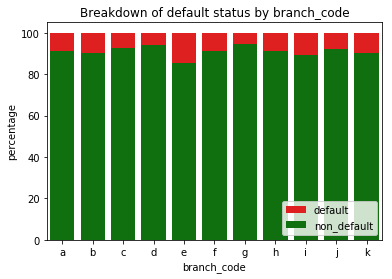

In [45]:
plot_cat_var(branch_defaulters, 'branch_code')

Most loans are given out by Branch A. Branch E has the worse default rates out of all the branches and Branch D and G are the better performing ones.

It would be good for personnel in Branch D and G to share their best practice on how to spot potential defaulters, so that default rate will be lowered.

Let's take a deeper look into the data on how Branch D and G spot potential defaulters. 

Before I continue with data exploration, I will first look at the correlation between each variables. I will remove either of the highly correlated variables as there are currently too many variables to look at and highly correlated variables will tell the same story.

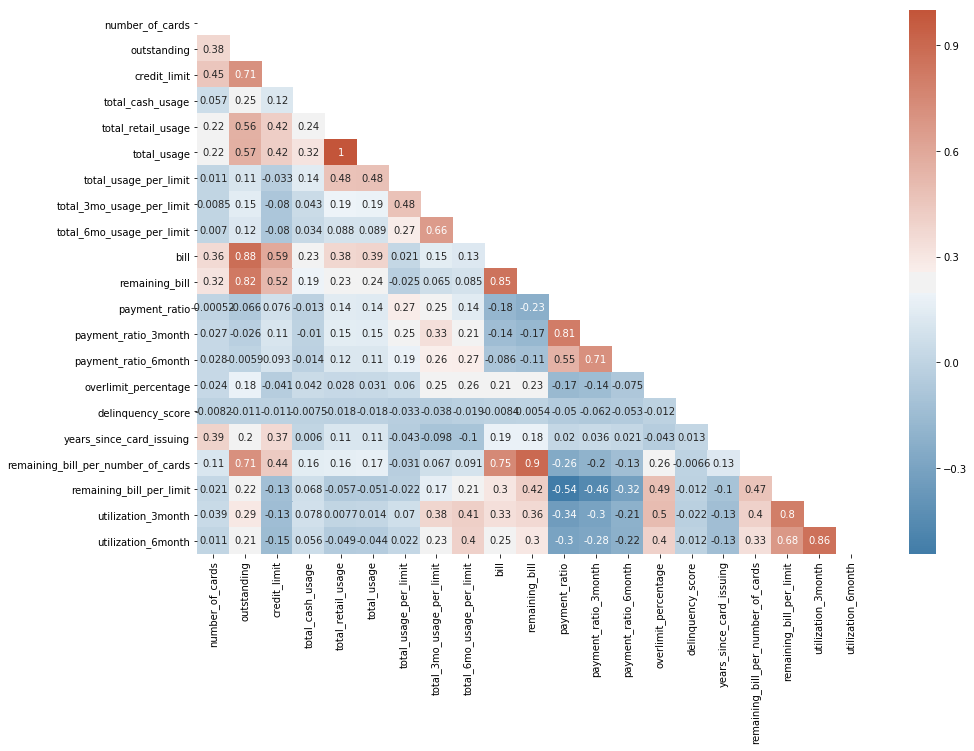

In [46]:
# plotting a heatmap of a correlation matrix of all the continuous variables
cont_var_df = combine[['number_of_cards',
       'outstanding', 'credit_limit', 'total_cash_usage',
       'total_retail_usage', 'total_usage', 'total_usage_per_limit',
       'total_3mo_usage_per_limit', 'total_6mo_usage_per_limit',
       'bill', 'remaining_bill', 'payment_ratio', 'payment_ratio_3month',
       'payment_ratio_6month', 'overlimit_percentage', 'delinquency_score',
       'years_since_card_issuing', 'remaining_bill_per_number_of_cards',
       'remaining_bill_per_limit', 'utilization_3month', 'utilization_6month']]

_ = plt.subplots(figsize = (15,10))

corr = cont_var_df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(600, 20, as_cmap=True)

_ = sns.heatmap(corr, mask=mask, annot=True, cmap =cmap)

We can observation strong correlation between:
- outstanding and bill, outstanding and remaining_bill. I will drop bill and remaining_bill
- total_usage and total_retail_usage. I will drop total_usage as total_cash_usage is a subset of total_usage
- payment_ratio and payment_ratio_3month. I will drop payment_ratio_3_month. Although I should note that I have replace 1/3 of payment_ratio with payment_ratio_3month
- utilization_3month and utilization_6month, utilization_3month and remaining_bill_per_limit. I will drop utilization_3month

In [47]:
# dropping highly correlated variables
combine2 = combine.drop(['bill', 'remaining_bill', 'total_usage', 'payment_ratio_3month', 'utilization_3month'], axis=1)

## Categorical Features

In [48]:
no_cards_defaulters = cat_var_processing(combine, 'number_of_cards')

In [49]:
no_cards_defaulters

default_flag,number_of_cards,non_default,default,total,total_pctg,non_default_pctg,default_pctg
0,1,63.0,9.0,72.0,100,87.5,12.5
1,2,9585.0,899.0,10484.0,100,91.4,8.6
2,3,2477.0,249.0,2726.0,100,90.9,9.1
3,4,993.0,109.0,1102.0,100,90.1,9.9
4,5,409.0,41.0,450.0,100,90.9,9.1
5,6,134.0,15.0,149.0,100,89.9,10.1
6,7,59.0,14.0,73.0,100,80.8,19.2
7,8,24.0,3.0,27.0,100,88.9,11.1
8,9,13.0,3.0,16.0,100,81.2,18.8
9,10,6.0,0.0,6.0,100,100.0,0.0


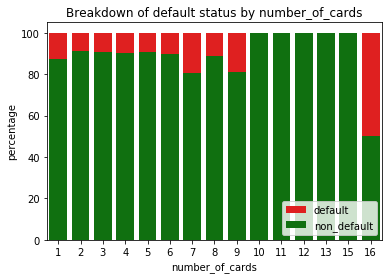

In [50]:
plot_cat_var(no_cards_defaulters, 'number_of_cards')

I will disregard observations made on customers having 10 or more cards as the sample size is way too small.

We can observe that most customer only have 2 or 3 credit cards and default rate (8.6% and 9.1% respectively) of these group of people are below the baseline default rate of 9.7%. 

Customers having 5 or more cards tend to have a higher default rate. However, it is worth to note that the sample size of these data points are quite small as well.

Interestingly, the default rate of customers having 1 credit card is above the average default rate. It could be that due to poor credit scoring, they were unable to obtain a second credit card.

Since having 2 or 3 credit cards is the norm and the default rate of these groups are below the baseline and the fact that the data points in other groups are sparse, I will engineer a new feature to split number_of_cards to two groups, having_2_or_3_cards or not. 

In [51]:
combine2 = (
    combine2
    .pipe(lambda x: x.assign(credit_limit_per_card=x.credit_limit/x.number_of_cards))
    .pipe(lambda x: x.assign(having_2_or_3_cards=np.where(((x.number_of_cards == 2)|(x.number_of_cards == 3)), 1, 0)))
)

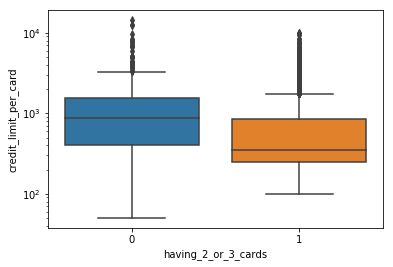

In [52]:
_ = sns.boxplot(x='having_2_or_3_cards', y='credit_limit_per_card', data=combine2)
_.set_yscale('log')

We can see that the credit_limit_per_card of users having 2 or 3 cards is lower that those who have 1 credit card or more than 3 credit cards. Normally credit limit is determine by a person's income. Having a lower credit limit would imply that the user's income is lower as well. Furthermore, we know what the default rate of users having 2 or 3 credit cards are lower than baseline, while the rest are higher. We can infer that perhaps users who are of a lower income group are more down-to-earth and have tigher spends as such, they do not spend excessively that will result in a default.

In [55]:
delinquency_defaulters = cat_var_processing(combine, 'delinquency_score')

In [56]:
delinquency_defaulters

default_flag,delinquency_score,non_default,default,total,total_pctg,non_default_pctg,default_pctg
0,0.0,13752.0,1239.0,14991.0,100,91.7,8.3
1,1.0,22.0,7.0,29.0,100,75.9,24.1
2,2.0,2.0,18.0,20.0,100,10.0,90.0
3,3.0,2.0,31.0,33.0,100,6.1,93.9
4,4.0,0.0,18.0,18.0,100,0.0,100.0
5,5.0,0.0,30.0,30.0,100,0.0,100.0


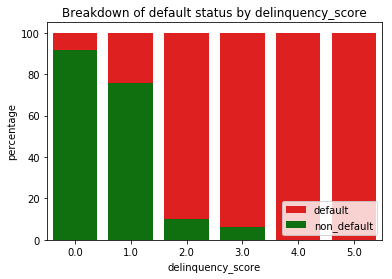

In [57]:
plot_cat_var(delinquency_defaulters, 'delinquency_score')

Delinquency_score has an obvious correlation to default rate. It is obvious that GoFin should not be giving out loans to users who have 1 or more.

In [58]:
delinquency_more_than_0_defaulters = (
    combine2
    .pipe(lambda x: x.assign(delinquency_score_more_than_0=np.where(x.delinquency_score>=1, 1, 0)))
    .groupby(['delinquency_score_more_than_0', 'branch_code'])
    .agg({"user_id": "count"})
    .reset_index()
    .pivot_table(columns='delinquency_score_more_than_0', index='branch_code', values='user_id', aggfunc=np.sum)
    .reset_index()
    .rename(columns={0: "delinquency_score_0", 1: "delinquency_score_more_than_0"})
    .pipe(lambda x: x.assign(score_more_than_0_pctg=round(x.delinquency_score_more_than_0/(x.delinquency_score_more_than_0+x.delinquency_score_0)*100, 1)))
)

In [59]:
delinquency_more_than_0_defaulters.merge(branch_defaulters, on='branch_code', how='left')[['branch_code', 'score_more_than_0_pctg', 'default_pctg']]

,branch_code,score_more_than_0_pctg,default_pctg
0,a,0.3,8.6
1,b,0.2,9.9
2,c,0.6,7.4
3,d,6.5,6.0
4,e,5.5,14.4
5,f,0.2,8.6
6,g,0.2,5.5
7,h,0.3,8.9
8,i,0.3,10.5
9,j,8.3,8.0


If Branch D, J & K were to pay more attention to delinquency_score, they would have 0 or close to 0 default rate.

Not paying attention to delinquency_score is also the main reason why Branch E have such a high default rate.

As the majority users (~99%) have a delinquency_score of 0, it would be pointless to have this feature in my model. I will drop this feature moving forward.

In [60]:
combine2.drop('delinquency_score', axis=1, inplace=True)

## Continuous Features

In [61]:
def plot_cont_var(df, column, boxplot=True, log=True, ax=1, x='default_flag'):
    if boxplot:
        if log:
            _ = sns.boxplot(x='{}'.format(x), y='{}'.format(column), data=df)
            _.set_yscale('symlog')
            _ = plt.title("Boxplot of {} (symlog scale)".format(column))
        else:
            _ = sns.boxplot(x='{}'.format(x), y='{}'.format(column), data=df)
            _ = plt.title("Boxplot of {}".format(column))
    else:
        if log:
            _ = sns.distplot(np.log(df.query("{} == 0".format(x))['{}'.format(column)]), ax=ax, label='non_default')
            _ = sns.distplot(np.log(df.query("{} == 1".format(x))['{}'.format(column)]), ax=ax, label='default')
            _ = plt.title("Distribution of {}".format(column))
            _ = ax.legend()
        else:
            _ = sns.distplot(df.query("{} == 0".format(x))['{}'.format(column)], ax=ax, label='non_default')
            _ = sns.distplot(df.query("{} == 0".format(x))['{}'.format(column)], ax=ax, label='default')
            _ = plt.title("Distribution of {}".format(column))
            _ = ax.legend()

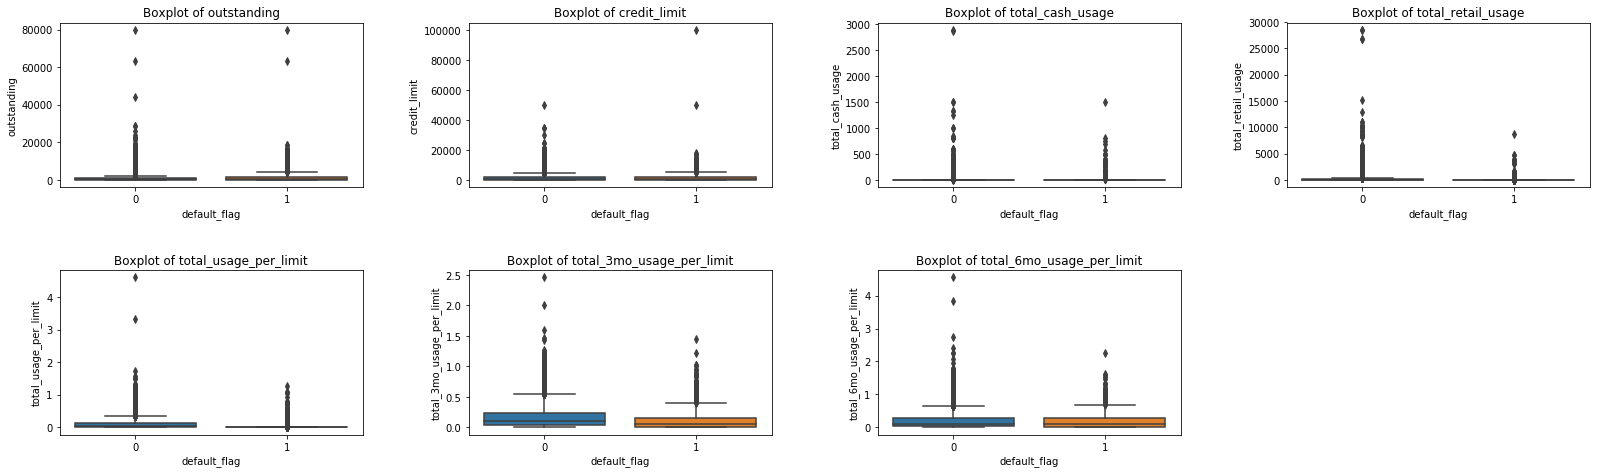

In [62]:
_ = plt.figure(figsize=(25,15))
start = 441
for idx, col in enumerate(['outstanding', 'credit_limit', 'total_cash_usage', 'total_retail_usage',
       'total_usage_per_limit', 'total_3mo_usage_per_limit',
       'total_6mo_usage_per_limit']):
    _ = plt.subplot(start + idx)
    _ = sns.boxplot(x='default_flag', y='{}'.format(col), data=combine2)
    _ = plt.title("Boxplot of {}".format(col))

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

Due to data skew, it is hard to see the distribution of each feature. I will re-plot the graphs again using symlog scale or removing skewed data points. 

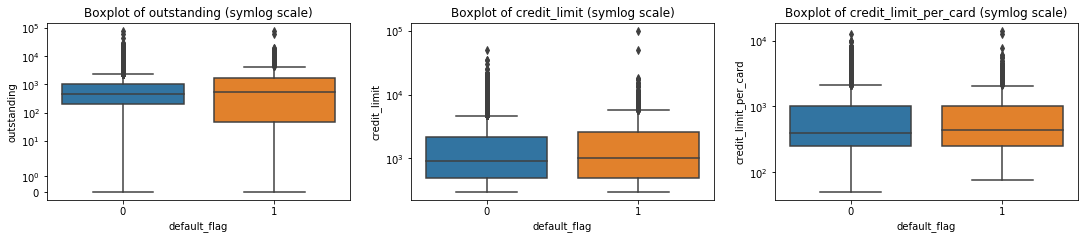

In [63]:
# re-plotting using symlog scale
_ = plt.figure(figsize=(25,15))
ax1 = plt.subplot(441)
plot_cont_var(combine2, 'outstanding', boxplot=True, log=True, ax=ax1)

ax2 = plt.subplot(442)
plot_cont_var(combine2, 'credit_limit', boxplot=True, log=True, ax=ax2)

ax3 = plt.subplot(443)
plot_cont_var(combine2, 'credit_limit_per_card', boxplot=True, log=True, ax=ax3)

The symlog scale will set a range around zero within the plot to be linear instead of logarithmic. This allows me to handle zero values.

We can see that distribution spread of outstanding amount for defaulters is quite wide. Defaulters are skewed towards having higher outstanding amount than non-defaulters. It is interesting to note that **there are defaulters even when the outstanding amount is very low**. I would think that GoFin should pay special attention to these group of people. It seems that **these are the poor and needy** and had to take a loan with GoFin probably to get by their daily lives. From the below table, we can see that these group of people have very **low spending history and their payment_ratio is higher than those defaulters who have high outstanding amount**. We can also observe that although the payment_ratio is higher than their counterpart, payment_ratio_6month is lower. This could mean that their source of income is unstable and could only make payment when they have an inflow of cash. Perhaps, GoFin could **spread their repayment plan across a longer period of time than norm while keeping interest rate low, so to help them financially as well as to not incur defaultment**.

As for credit limit, not much observation can be made. Similar to the above inference regarding credit_limit_per_card, the credit limit for defaulter is slightly higher than non-defaulters.

In [64]:
# poor and needy group
(
    combine
    .query("default_flag == 1 and outstanding < {}".format(combine2.outstanding.quantile(q=0.25)))
    [['outstanding', 'credit_limit', 'total_retail_usage', 'total_3mo_usage_per_limit', 'total_6mo_usage_per_limit', 'payment_ratio', 
      'payment_ratio_6month', 'remaining_bill_per_number_of_cards', 'remaining_bill_per_limit', 'utilization_6month']]
    .describe()
)

,outstanding,credit_limit,total_retail_usage,total_3mo_usage_per_limit,total_6mo_usage_per_limit,payment_ratio,payment_ratio_6month,remaining_bill_per_number_of_cards,remaining_bill_per_limit,utilization_6month
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,25.823359,1806.329114,3.412340,0.014330,0.035575,0.329988,0.345148,8.456062,0.034319,0.119096
std,42.212225,2251.223118,17.863162,0.044898,0.113555,0.366172,0.431215,20.216930,0.103596,0.212897
min,0.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.254800,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002025
50%,8.483900,700.000000,0.000000,0.000018,0.000000,0.250000,0.099900,1.087800,0.000656,0.020000
75%,18.026100,2100.000000,0.062950,0.004950,0.009695,0.500000,0.649000,4.590750,0.011450,0.129000
max,201.025900,18000.000000,291.352900,0.426000,1.160000,1.920000,1.940000,100.513000,0.670000,1.110000


In [65]:
# the rest
(
    combine
    .query("default_flag == 1 and outstanding >= {}".format(combine2.outstanding.quantile(q=0.25)))
    [['outstanding', 'credit_limit', 'total_retail_usage', 'total_3mo_usage_per_limit', 'total_6mo_usage_per_limit', 'payment_ratio', 
      'payment_ratio_6month', 'remaining_bill_per_number_of_cards', 'remaining_bill_per_limit', 'utilization_6month']]
    .describe()
)

,outstanding,credit_limit,total_retail_usage,total_3mo_usage_per_limit,total_6mo_usage_per_limit,payment_ratio,payment_ratio_6month,remaining_bill_per_number_of_cards,remaining_bill_per_limit,utilization_6month
count,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000
mean,2390.671699,2443.037975,90.716620,0.162083,0.250389,0.309453,0.452363,695.432874,0.912413,0.852413
std,4403.038995,4481.382825,483.714433,0.184896,0.265557,0.302241,0.369753,950.706427,0.360888,0.309681
min,203.759200,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,502.258375,500.000000,0.000000,0.038600,0.070475,0.101000,0.139000,182.442225,0.772750,0.664000
50%,893.138800,1000.000000,0.000000,0.101000,0.157500,0.196000,0.320000,349.584900,1.028917,0.897225
75%,2410.627950,2825.000000,4.800000,0.232000,0.354000,0.402500,0.702250,819.160842,1.130000,1.040000
max,79805.857400,100000.000000,8746.865800,1.450000,2.250000,1.990000,2.150000,11100.000000,2.066251,1.850000


In [66]:
# using iqr to spot outliers
def upper_limit(df, column):
    iqr = df['{}'.format(column)].quantile(q=0.75) - df['{}'.format(column)].quantile(q=0.25)
    upper_limit = df['{}'.format(column)].quantile(q=0.75) + 1.5*iqr
    return upper_limit

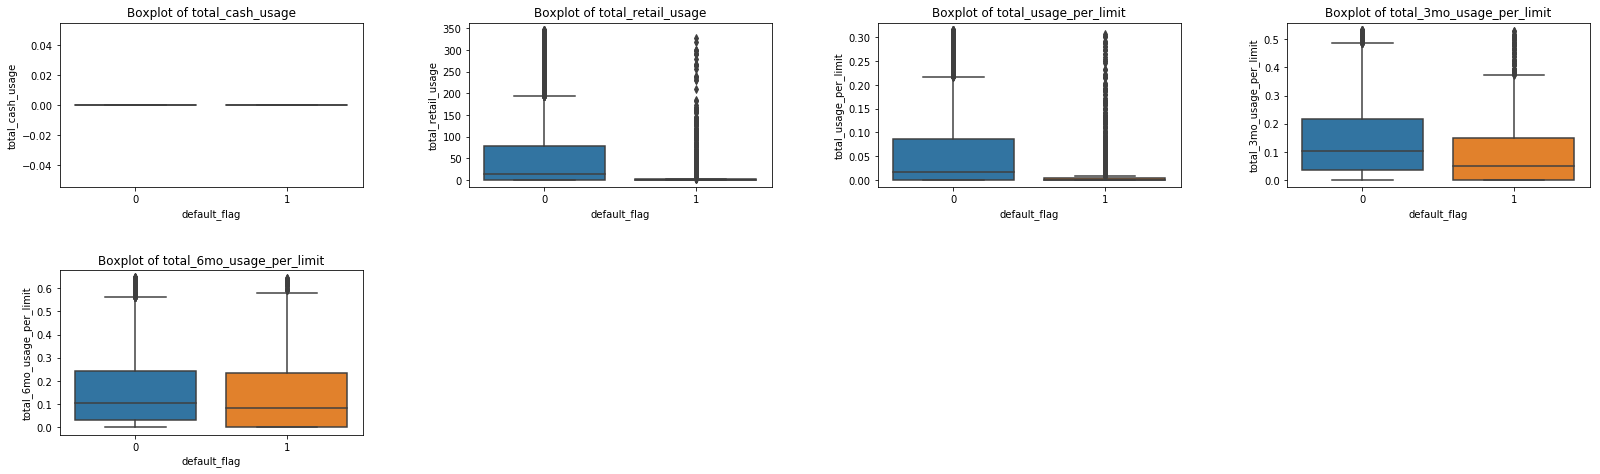

In [67]:
_ = plt.figure(figsize=(25,15))
ax1 = plt.subplot(441)
total_cash_usage_upper = upper_limit(combine2, 'total_cash_usage')
plot_cont_var(combine2.query("total_cash_usage <= {}".format(total_cash_usage_upper)), 'total_cash_usage', boxplot=True, log=False, ax=ax1)

ax2 = plt.subplot(442)
total_retail_usage_upper = upper_limit(combine2, 'total_retail_usage')
plot_cont_var(combine2.query("total_retail_usage <= {}".format(total_retail_usage_upper)), 'total_retail_usage', boxplot=True, log=False, ax=ax2)

ax3 = plt.subplot(443)
total_usage_per_limit_upper = upper_limit(combine2, 'total_usage_per_limit')
plot_cont_var(combine2.query("total_usage_per_limit <= {}".format(total_usage_per_limit_upper)), 'total_usage_per_limit', boxplot=True, log=False, ax=ax3)

ax4 = plt.subplot(444)
total_3mo_usage_per_limit_upper = upper_limit(combine2, 'total_3mo_usage_per_limit')
plot_cont_var(combine2.query("total_3mo_usage_per_limit <= {}".format(total_3mo_usage_per_limit_upper)), 'total_3mo_usage_per_limit', boxplot=True, log=False, ax=ax4)

ax5 = plt.subplot(445)
total_6mo_usage_per_limit_upper = upper_limit(combine2, 'total_6mo_usage_per_limit')
plot_cont_var(combine2.query("total_6mo_usage_per_limit <= {}".format(total_6mo_usage_per_limit_upper)), 'total_6mo_usage_per_limit', boxplot=True, log=False, ax=ax5)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

Instead of using symlog scale, I have filtered out skewed data points to plot out the distribution of these usage features. The reason why I did not use symlog was because some of these features have too many zero values and the charts will become unreadable as well (similar to the first iteration).

The distribution of total_cash_usage is as such because the majority of total_cash_usage values (~95%) are zero.

We can see that defaulters tend to have lower usage and the first sign of financial trouble can be observed 3 months ago (total_3mo_usage_per_limit). GoFin could use this information to **target potential borrowers** and assist them in better financial planning to ensure that they do not default.

It is heartening to see that a majority of the users lowered their spending when they know they have financial issues. GoFin should **take note of the group of users who still spend as per normal despite having financial problems**. From the table below, we can see that the credit limit of those who are not reducing spend is higher than those who had reduced. This shows that their income level is probably higher as well. If GoFin still decides to loan out money to this group, GoFin should **charge them a higher interest**. Not only will it **dissuade them from spending above their current limits**, GoFin would also be able to **maximise profit as this group are more probable in making the high interest repayment**, with their assumed higher income.

In [68]:
# defaulters who are not lowering spend
(
    combine2
    .query("default_flag == 1 and total_retail_usage > {}".format(combine2.total_retail_usage.median()))
    [['total_retail_usage', 'total_3mo_usage_per_limit', 'outstanding', 'credit_limit', 'credit_limit_per_card']]
    .describe()
)

,total_retail_usage,total_3mo_usage_per_limit,outstanding,credit_limit,credit_limit_per_card
count,197.000000,197.000000,197.000000,197.000000,197.000000
mean,437.670124,0.201633,3328.763954,3670.050761,1082.765188
std,989.133176,0.201352,7668.487610,8335.531672,1648.500297
min,20.860000,0.000000,0.000000,300.000000,100.000000
25%,49.086700,0.066800,558.516500,700.000000,250.000000
50%,111.831900,0.142000,1141.326400,1500.000000,500.000000
75%,300.000000,0.260000,3513.588200,4400.000000,1233.333333
max,8746.865800,1.010000,79805.857400,100000.000000,14285.714286


In [69]:
# defaulters who are lowering spend
(
    combine2
    .query("default_flag == 1 and total_retail_usage < {}".format(combine2.total_retail_usage.median()))
    [['total_retail_usage', 'total_3mo_usage_per_limit', 'outstanding', 'credit_limit', 'credit_limit_per_card']]
    .describe()
)

,total_retail_usage,total_3mo_usage_per_limit,outstanding,credit_limit,credit_limit_per_card
count,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000
mean,0.982736,0.104357,1414.302355,2012.652705,767.540410
std,2.926212,0.161107,2606.213205,2481.048964,892.279885
min,0.000000,0.000000,2.069000,300.000000,75.000000
25%,0.000000,0.000000,16.614200,500.000000,250.000000
50%,0.000000,0.040954,482.931050,900.000000,400.000000
75%,0.000000,0.145750,1357.141200,2300.000000,966.666667
max,20.000000,1.450000,18827.608000,18000.000000,7700.000000


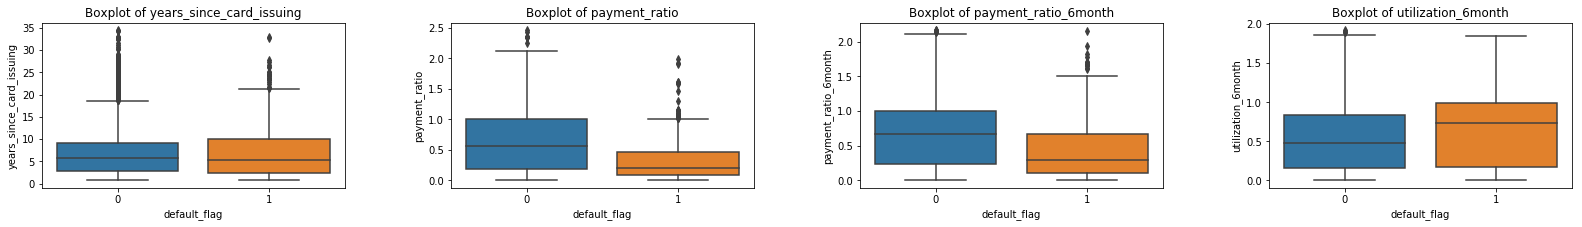

In [70]:
_ = plt.figure(figsize=(25,15))
start = 441
for idx, col in enumerate(['years_since_card_issuing', 'payment_ratio', 'payment_ratio_6month', 'utilization_6month']):
    _ = plt.subplot(start + idx)
    _ = sns.boxplot(x='default_flag', y='{}'.format(col), data=combine2)
    _ = plt.title("Boxplot of {}".format(col))

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

It is expected to see that the payment ratios of defaulters are lower than non-defaulters. The difference in payment ratio between defaulters and non-defaulters is more stark when a more recent metric (payment_ratio) is used. Defaulters also tend to have higher utilization rate.

GoFin could use payment ratios as a simple metric to gauge potential defaulters. For example, if the user would incur an interest of X% when taking a loan from GoFin, GoFin could refer to his/her latest payment_ratio to check whether is the person able to repay the interest rate. If the payment_ratio is below X%, it shows that the user would probably default.

Defaulters tend to have:
- higher outstanding amount 
- higher utilization rate 
- lower usage amount
- lower payment ratio 

Did Branch D and G managed to catch all these?

In [71]:
# creating new column called branch_d_g where entries that are belongs to branch d or g will be 1, the rest 0
combine3= (
    combine2
    .pipe(lambda x: x.assign(branch_d_g=np.where(x.branch_code=='d', 1,
                                                np.where(x.branch_code=='g', 1, 0))))
)

In [72]:
# branch D and G
combine3.query("branch_d_g == 1 and default_flag == 1")[['outstanding', 'utilization_6month', 'total_retail_usage', 'total_usage_per_limit', 'total_3mo_usage_per_limit', 'payment_ratio', 'payment_ratio_6month']].describe()

,outstanding,utilization_6month,total_retail_usage,total_usage_per_limit,total_3mo_usage_per_limit,payment_ratio,payment_ratio_6month
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,1368.410893,0.749592,81.073640,0.038587,0.160424,0.355102,0.444440
std,1898.741874,0.435787,293.351158,0.096711,0.199159,0.286905,0.342695
min,2.632300,0.000499,0.000000,0.000000,0.000000,0.000000,0.047000
25%,385.614725,0.560750,0.000000,0.000000,0.018925,0.149750,0.122025
50%,612.887450,0.849000,0.000000,0.000000,0.107000,0.272600,0.346500
75%,1837.664175,1.077500,5.500000,0.004064,0.217000,0.489500,0.700000
max,9209.977600,1.510000,1420.018600,0.478139,0.946784,1.030000,1.000100


In [73]:
# other branches
combine3.query("branch_d_g == 0 and default_flag == 1")[['outstanding', 'utilization_6month', 'total_retail_usage', 'total_usage_per_limit', 'total_3mo_usage_per_limit', 'payment_ratio', 'payment_ratio_6month']].describe()

,outstanding,utilization_6month,total_retail_usage,total_usage_per_limit,total_3mo_usage_per_limit,payment_ratio,payment_ratio_6month
count,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000
mean,1705.675434,0.633088,64.521243,0.031973,0.117277,0.314214,0.420067
std,3899.392187,0.438773,411.647962,0.113184,0.169964,0.323456,0.393309
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.518200,0.163000,0.000000,0.000000,0.000322,0.091500,0.106000
50%,533.971900,0.732000,0.000000,0.000000,0.055300,0.200000,0.286000
75%,1711.118500,0.988000,2.000000,0.004000,0.162000,0.461000,0.671000
max,79805.857400,1.850000,8746.865800,1.270260,1.450000,1.990000,2.150000


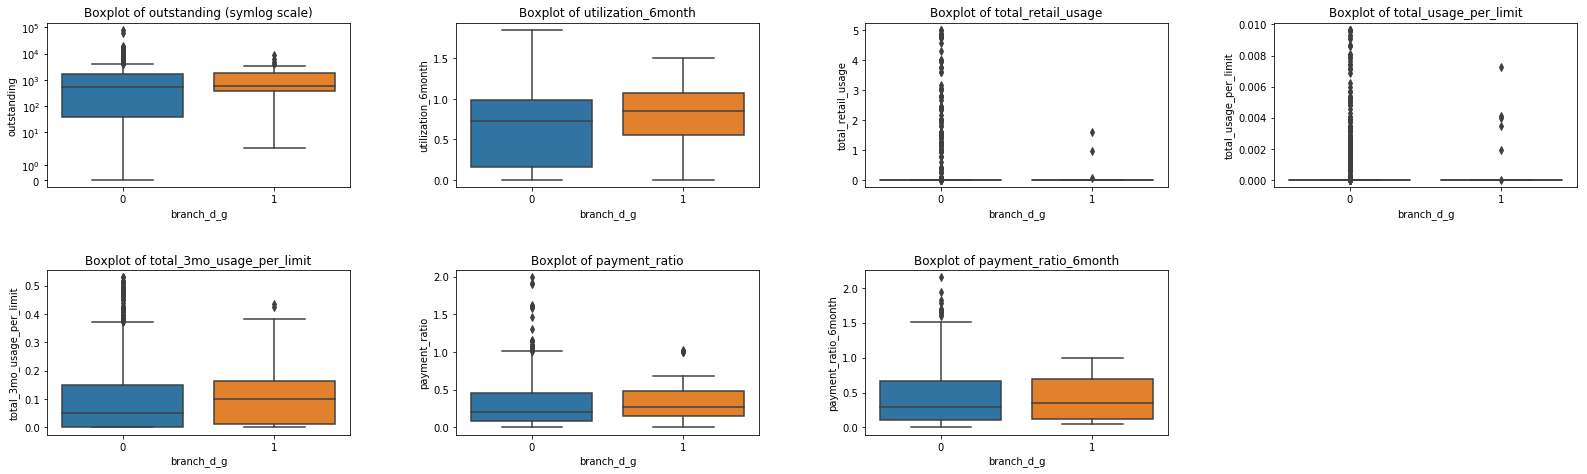

In [74]:
_ = plt.figure(figsize=(25,15))
ax1 = plt.subplot(441)
plot_cont_var(combine3.query("default_flag == 1"), 'outstanding', boxplot=True, log=True, ax=ax1, x='branch_d_g')

ax2 = plt.subplot(442)
_ = sns.boxplot(x='branch_d_g', y='utilization_6month', data=combine3.query("default_flag == 1"))
_ = plt.title("Boxplot of utilization_6month")

ax3 = plt.subplot(443)
total_retail_usage_upper = upper_limit(combine2.query("default_flag == 1"), 'total_retail_usage')
plot_cont_var(combine3.query("default_flag == 1 and total_retail_usage <= {}".format(total_retail_usage_upper)), 'total_retail_usage', boxplot=True, log=False, ax=ax3,  x='branch_d_g')

ax4 = plt.subplot(444)
total_usage_per_limit_upper = upper_limit(combine2.query("default_flag == 1"), 'total_usage_per_limit')
plot_cont_var(combine3.query("default_flag == 1 and total_usage_per_limit <= {}".format(total_usage_per_limit_upper)), 'total_usage_per_limit', boxplot=True, log=False, ax=ax4,  x='branch_d_g')

ax5 = plt.subplot(445)
total_3mo_usage_per_limit_upper = upper_limit(combine2, 'total_3mo_usage_per_limit')
plot_cont_var(combine3.query("default_flag == 1 and total_3mo_usage_per_limit <= {}".format(total_3mo_usage_per_limit_upper)), 'total_3mo_usage_per_limit', boxplot=True, log=False, ax=ax5,  x='branch_d_g')

ax6 = plt.subplot(446)
_ = sns.boxplot(x='branch_d_g', y='payment_ratio', data=combine3.query("default_flag == 1"))
_ = plt.title("Boxplot of payment_ratio")


ax7 = plt.subplot(447)
_ = sns.boxplot(x='branch_d_g', y='payment_ratio_6month', data=combine3.query("default_flag == 1"))
_ = plt.title("Boxplot of payment_ratio_6month")


plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)


We can see that users who took loans from Branch D and G have relatively higher total_3mo_usage_per_limit and payment_ratio as compared to other branches. This resulted in them having lower default rates as compared to other branches.

# Model

## Summary
- Two models output were not great. Accuracy did not beat baseline accuracy of 90.3%
- However, the recall score of the first model is good
- When it comes to model evaluation, GoFin should be more concern with recall score as it tells us how many actual defaulters are selected
- GoFin needs to balance the cost of have too many False Positives vs False Negatives
- Payment ratio and usage level are the most important features to predict defaulters
- Branch D and G did a great job in noticing them
- Could have tried boosting models

In [75]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, make_scorer

from sklearn.externals import joblib

from imblearn.over_sampling import SMOTE

/Users/timong/anaconda/envs/py36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [76]:
combine2.head(2)

,user_id,branch_code,default_flag,number_of_cards,outstanding,credit_limit,total_cash_usage,total_retail_usage,total_usage_per_limit,total_3mo_usage_per_limit,total_6mo_usage_per_limit,payment_ratio,payment_ratio_6month,overlimit_percentage,years_since_card_issuing,remaining_bill_per_number_of_cards,remaining_bill_per_limit,utilization_6month,credit_limit_per_card,having_2_or_3_cards
0,1,i,0,2,3.6158,700.0,0.0,0.0094,0.000013,0.011719,0.01781,1.0219,1.0,0.0,15.416667,1.31615,0.00376,0.021949,350.0,1
1,2,a,0,2,26.8691,1000.0,0.0,0.1012,0.000101,0.000000,0.00000,0.0000,0.0,0.0,0.750000,0.00000,0.00000,0.000300,500.0,1


In [77]:
y = combine2.default_flag.values

In [78]:
# dropping total_cash_usage because majority of the values are 0
# creating new feature called is_overlimit, where 1 = overlimit_percentage > 0 and 0 = overlimit_percentage = 0
X = (
    combine2
    .pipe(lambda x: x.assign(is_overlimit=np.where(x.overlimit_percentage>0, 1, 0)))
    .drop(['user_id', 'branch_code', 'default_flag', 'number_of_cards', 'total_cash_usage', 'overlimit_percentage', 'credit_limit'], axis=1)
)

In [79]:
X.head()

,outstanding,total_retail_usage,total_usage_per_limit,total_3mo_usage_per_limit,total_6mo_usage_per_limit,payment_ratio,payment_ratio_6month,years_since_card_issuing,remaining_bill_per_number_of_cards,remaining_bill_per_limit,utilization_6month,credit_limit_per_card,having_2_or_3_cards,is_overlimit
0,3.6158,0.0094,0.000013,0.011719,0.017810,1.0219,1.0000,15.416667,1.31615,0.003760,0.021949,350.000000,1,0
1,26.8691,0.1012,0.000101,0.000000,0.000000,0.0000,0.0000,0.750000,0.00000,0.000000,0.000300,500.000000,1,0
2,676.9149,0.0000,0.000000,0.040518,0.047703,1.0000,1.0091,10.750000,0.00000,0.000000,0.267853,933.333333,1,0
3,349.6732,253.6660,0.120793,0.055971,0.016851,1.0000,0.2264,19.750000,14.53335,0.027683,0.346635,525.000000,0,0
4,940.2085,266.6558,0.266656,0.323027,0.131162,0.9599,0.9984,1.666667,297.59325,0.595186,0.336571,500.000000,1,0


In [80]:
# checking for multi-collinearity amongst X matrix
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,5.290368,outstanding
1,2.575063,total_retail_usage
2,2.348370,total_usage_per_limit
3,4.389666,total_3mo_usage_per_limit
4,3.617509,total_6mo_usage_per_limit
5,5.447502,payment_ratio
6,4.971756,payment_ratio_6month
7,2.853440,years_since_card_issuing
8,4.214386,remaining_bill_per_number_of_cards
9,6.408319,remaining_bill_per_limit


In [81]:
# getting training set (77%) and testing set (33%)
# stratified so that the split of the imbalance dataset between train and test set will be the same
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 3, stratify=y)

In [82]:
# scale X matrix with StandardScaler
ss = StandardScaler()
Xss_train = ss.fit_transform(X_train)

Xss_test = ss.transform(X_test)

# SMOTE the training set as the data set is skewed towards having more non_defaulters
sm = SMOTE(random_state = 1, ratio = 'minority')
Xss_sm_train, y_sm_train = sm.fit_sample(Xss_train, y_train)

/Users/timong/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/timong/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/timong/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [83]:
# using RandomForestClassifer as an estimator
rclf = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=1)

# train 30% of the training set
rclf.fit(Xss_sm_train, y_sm_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [84]:
gs_params ={
    'criterion': ['gini'],
    'max_depth': [None,1,5,10],
    'max_features': ['auto',3,7],
    'n_estimators':[200, 500, 1000],
    'random_state':[1]
}

rclf_gs = GridSearchCV(RandomForestClassifier(), gs_params, n_jobs = -1, verbose = 1, cv = 3, scoring='recall')

In [85]:
rclf_gs.fit(Xss_sm_train, y_sm_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  8.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['gini'], 'max_depth': [None, 1, 5, 10], 'max_features': ['auto', 3, 7], 'n_estimators': [200, 500, 1000], 'random_state': [1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=1)

In [86]:
rclf_gs.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'n_estimators': 500,
 'random_state': 1}

In [87]:
# using gs best parameters
rclf_gs_best = rclf_gs.best_estimator_

In [88]:
# function to evaulate performance of model
def sup_perf(model, X_test, y_test):
    model_yhat = model.predict(X_test)
    model_score = model.score(X_test, y_test)
    model_f1 = f1_score(y_test, model_yhat, average = 'binary')
    model_precision = precision_score(y_test, model_yhat, average = 'binary')
    model_recall = recall_score(y_test, model_yhat, average = 'binary')
    model_auc = roc_auc_score(y_test, model_yhat, average = 'macro')
    
    return (model_score, model_precision, model_recall, model_f1, model_auc)

In [89]:
score_rclf, precision_rclf, recall_rclf, f1_rclf, auc_rclf = sup_perf(rclf, Xss_test, y_test)

In [98]:
score_rclf_gs_best, precision_rclf_gs_best, recall_rclf_gs_best, f1_rclf_gs_best, auc_rclf_gs_best = sup_perf(rclf_gs_best, Xss_test, y_test)

In [91]:
rclf_yhat = rclf.predict(Xss_test)
print (classification_report(y_test, rclf_yhat, labels = [0,1], target_names=['non_default','default']))

              precision    recall  f1-score   support

 non_default       0.97      0.67      0.80      4547
     default       0.20      0.82      0.32       443

   micro avg       0.69      0.69      0.69      4990
   macro avg       0.59      0.75      0.56      4990
weighted avg       0.91      0.69      0.75      4990



In [92]:
# confusion matrix based normal random forest
conmat = pd.DataFrame(confusion_matrix(y_test, rclf_yhat, labels = [0,1]),
                      index = ['actual_non_default','actual_default'],
                      columns = ['predict_non_default','predict_default'])
conmat

,predict_non_default,predict_default
actual_non_default,3064,1483
actual_default,80,363


In [93]:
rclf_gs_best_yhat = rclf_gs_best.predict(Xss_test)
print (classification_report(y_test, rclf_gs_best_yhat, labels = [0,1], target_names=['non_default','default']))

              precision    recall  f1-score   support

 non_default       0.94      0.91      0.93      4547
     default       0.32      0.42      0.36       443

   micro avg       0.87      0.87      0.87      4990
   macro avg       0.63      0.67      0.64      4990
weighted avg       0.89      0.87      0.88      4990



In [94]:
# confusion matrix based on random forest with grid search
conmat = pd.DataFrame(confusion_matrix(y_test, rclf_gs_best_yhat, labels = [0,1]),
                      index = ['actual_non_defau;t','actual_default'],
                      columns = ['predict_non_default','predict_default'])
conmat

,predict_non_default,predict_default
actual_non_defau;t,4141,406
actual_default,255,188


In [100]:
model_comparison = pd.DataFrame({'rclf':[score_rclf, precision_rclf, recall_rclf, f1_rclf, auc_rclf],\
                                     'rclf (grid_search)':[score_rclf_gs_best, precision_rclf_gs_best, recall_rclf_gs_best, f1_rclf_gs_best, auc_rclf_gs_best]},\
                                    index = ['accuracy score','precision score (fraud)','recall score (fraud)','f1 score (fraud)','auc score (unweighted mean)'])
model_comparison

,rclf,rclf (grid_search)
accuracy score,0.686774,0.867535
precision score (fraud),0.196641,0.316498
recall score (fraud),0.819413,0.424379
f1 score (fraud),0.317169,0.362584
auc score (unweighted mean),0.746632,0.667545


In [95]:
# observing feature importance of normal random forest model
feature_impt = pd.DataFrame({'importance': rclf.feature_importances_, 'features':X.columns})
feature_impt.sort_values('importance', ascending = False).reset_index(drop=True)

,features,importance
0,payment_ratio,0.223744
1,total_retail_usage,0.166121
2,total_usage_per_limit,0.146446
3,remaining_bill_per_limit,0.084147
4,payment_ratio_6month,0.066992
5,remaining_bill_per_number_of_cards,0.061405
6,total_3mo_usage_per_limit,0.060965
7,is_overlimit,0.060608
8,outstanding,0.056963
9,utilization_6month,0.026462
